# Laura Gómez Bodego

# Miriam Martín Sánchez

In [1]:
# % %
import matplotlib.pyplot as plt
import numpy as np
import time
# gráficos en el notebook
%matplotlib inline
SRATE = 441000 # Sample rate, para todo el programa

#### Ejercicio 1

In [2]:
def noise(dur):   
    # emtpy necesita argumento int 
    a = np.empty(round(dur*SRATE))
    for i in range(a.size):
        # convertimos valores de [0,1) en [-1,1)
        # a[i] = np.random.random()*2-1      

        # otra forma mád directa
        a[i] = np.random.uniform(-1,1)
    return a

time: 10.991678714752197
Num muestras: 4410000


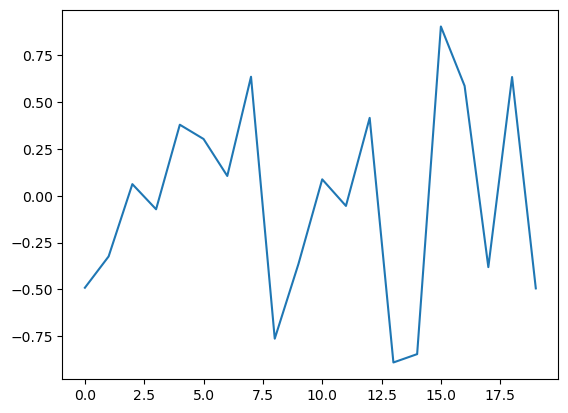

In [3]:
start = time.time()
dur = 10
a = noise(dur)
print(f'time: {time.time() - start}')

# round(dur*SRATE): numero de muestras de la señal
print(f'Num muestras: {round(dur*SRATE)}')
plt.plot(a[:20])

In [4]:
def noise2(dur):
    # uniform necesita int
    return np.random.uniform(-1,1,round(dur*SRATE))

start = time.time()
dur = 10
a = noise2(dur)
print(f'time: {time.time() - start}')

time: 0.03377962112426758


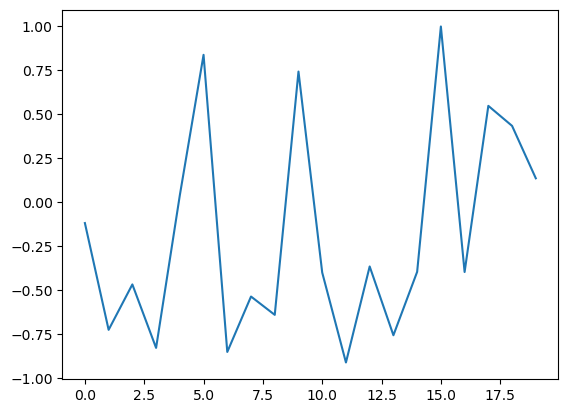

In [5]:
plt.plot(a[:20])

#### Ejercicio 2

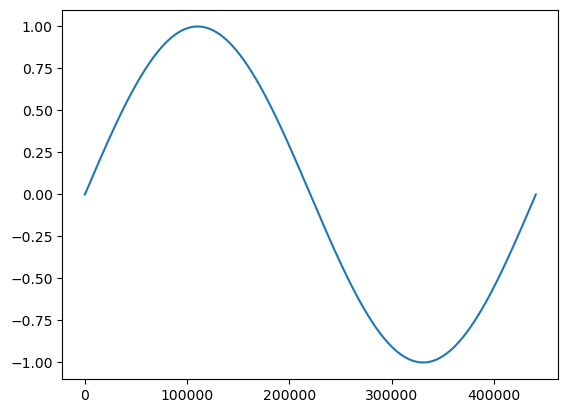

In [6]:
# arange no necesita conversion a int de SRATE*dur 
dur = 1
freq = 1
a = np.sin(np.arange(SRATE*dur)*2*np.pi*freq/SRATE)

plt.plot(a)

#### Ejercicio 3

In [8]:
def osc(freq,dur=1,amp=1,phase=0, srate =  441000):
    # Calcula el tamaño del array en función de la duración y la tasa de muestreo
    size = int(dur * SRATE)
     # Calcula la señal sinusoidal con la frecuencia, amplitud y fase especificadas
    t = np.arange(size) / SRATE
    signal = amp * np.sin(2 * np.pi * freq * t + phase)
    
    return signal

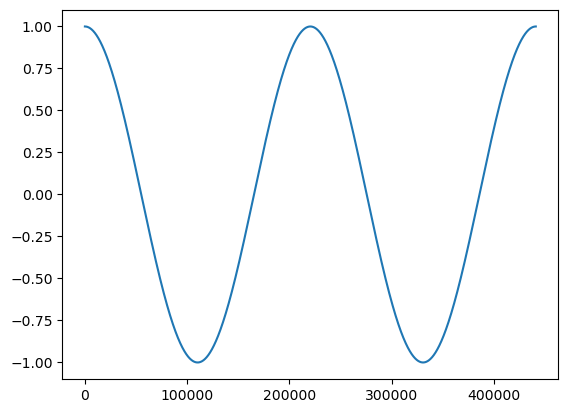

In [9]:
a = osc(2,1,1,np.pi/2,SRATE) 
plt.plot(a)

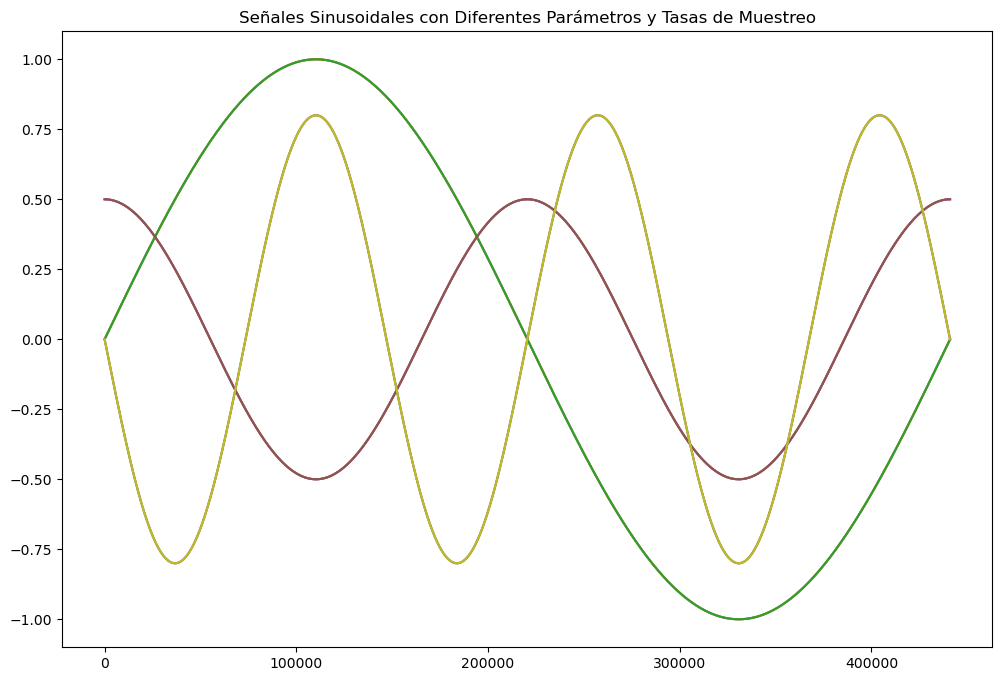

In [13]:
freqs = [1, 2, 3]  # Frecuencias en Hz
durs = [1, 1, 1]    # Duraciones en segundos
amps = [1, 0.5, 0.8]  # Amplitudes
phases = [0, np.pi/2, np.pi]  # Fases en radianes

# Diferentes tasas de muestreo
srates = [44100, 22050, 11025]

# Crear y dibujar las señales
plt.figure(figsize=(12, 8))

for i in range(len(freqs)):
    for srate in srates:
        signal = osc(freqs[i], durs[i], amps[i], phases[i],srate)
        label = f'Freq: {freqs[i]} Hz, Dur: {durs[i]}s, Amp: {amps[i]}, Phase: {phases[i]}, SRATE: {srate}'
        plt.plot(signal, label=label)
plt.title('Señales Sinusoidales con Diferentes Parámetros y Tasas de Muestreo')
plt.show()

#### Ejercicio 4

In [21]:
def modulator(sample, freq):
    modulator_signal = osc(freq, len(sample)/SRATE, 1/2) + 0.5
    modulated_signal = sample * modulator_signal
    return modulated_signal

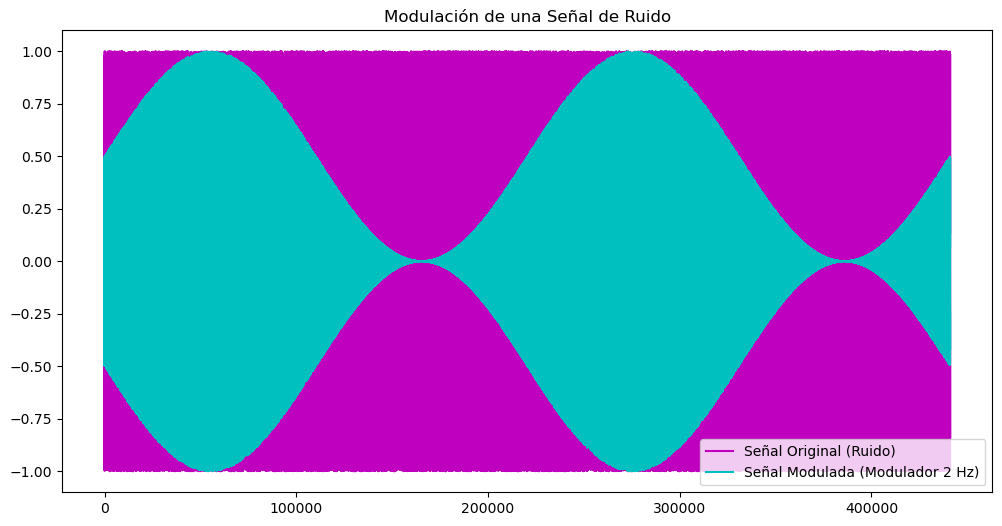

In [30]:
# Crear un fragmento de ruido como entrada
dur = 1  # Duración en segundos
noise = np.random.uniform(-1, 1, int(dur * SRATE))

# Parámetros del modulador
mod_freq = 2  # Frecuencia del modulador en Hz (oscila en [0,1])

# Aplicar el modulador a la señal de ruido
modulated_signal = modulator(noise, mod_freq)

# Dibujar la señal original y la señal modulada
plt.figure(figsize=(12, 6))
plt.plot(noise, label='Señal Original (Ruido)', color = 'm')
plt.plot(modulated_signal, label=f'Señal Modulada (Modulador {mod_freq} Hz)', color = 'c')
plt.title('Modulación de una Señal de Ruido')
plt.legend()
plt.show()

Si dejamos que el modulador oscile entre -1 y 1, la amplitud total de la modulación puede variar desde el valor negativo máximo hasta el valor positivo máximo, lo que podría causar inversiones de fase e interferencias destructivas con otras señales